In [2]:
import requests
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

C:\Users\USER\AppData\Local\Temp\ipykernel_15060\1590952147.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [118]:
url = "https://jobicy.p.rapidapi.com/api/v2/remote-jobs"

# Request headers
headers = {
    "X-RapidAPI-Key": "d193e29157msh16cba69f1b99500p1aa91cjsn89fb8a04c8a6",
    "X-RapidAPI-Host": "jobicy.p.rapidapi.com"
}

# Make the API request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a pandas DataFrame
    data = response.json()['jobs']
    df = pd.DataFrame(data)
    
    # Save the DataFrame to a CSV file
    df.to_csv('jobs1.csv', index=False)
    
    print("Data has been successfully saved to 'jobs1.csv'")
else:
    print(f"Error in obtaining data: {response.status_code}")

Data has been successfully saved to 'jobs1.csv'


# EDA

In [3]:
jobs1 = pd.read_csv('jobs1.csv')
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [130]:
jobs1.shape

(3755, 11)

In [132]:
jobs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


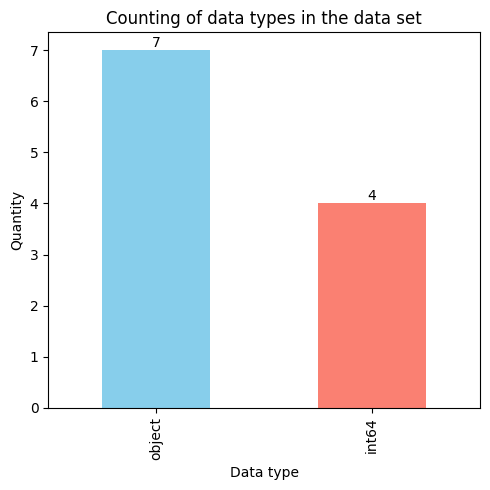

In [133]:
import matplotlib.pyplot as plt

data_types_counts = jobs1.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

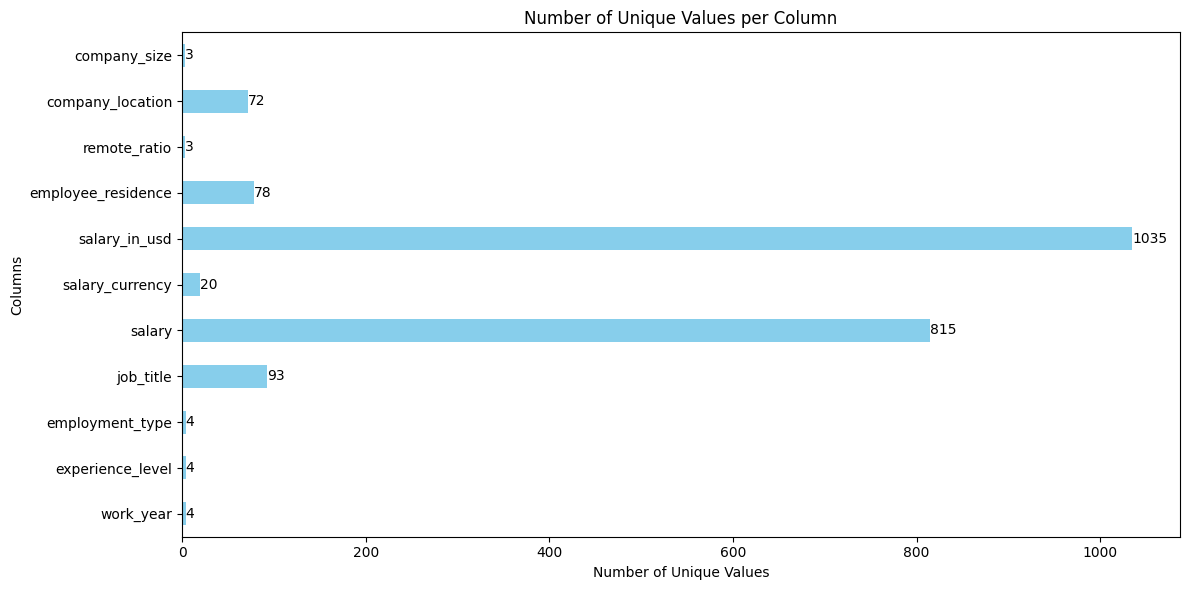

In [134]:
import matplotlib.pyplot as plt


unique_counts = jobs1.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

In [147]:
print(jobs1.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [135]:
jobs1.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [136]:
jobs1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Check duplicated:

In [4]:
jobs1.duplicated().sum()

1171

1. Transformation #1: Drop duplicates

In [5]:
jobs1=jobs1.drop_duplicates()
jobs1.duplicated().sum()

0

- Data Types: The data types of our dataset are accurate and appropriate for our analysis, indicating that the data is well-structured.

- Missing Values: We found no missing values in our dataset. This suggests that our data is complete and ready for analysis without the need for imputation.

- Duplicate Entries: Initially, there were 1351 duplicate entries in the dataset. However, we have successfully removed these duplicate rows, ensuring data integrity for our analysis.

These observations assure us that our dataset is in good shape and suitable for further analysis and insights.

###  Checking Unique Values in Selected Columns

In this step, we will examine the unique values in certain columns, such as:

- Experience Level
- Employment Type
- Company Size
The purpose of this step is to identify values that may need to be replaced with more appropriate and standardized terms.

In [6]:
unique_experience_levels = jobs1['experience_level'].unique()
unique_employment_types = jobs1['employment_type'].unique()
unique_company_sizes = jobs1['company_size'].unique()

print("Unique Experience Levels:", unique_experience_levels)
print("Unique Employment Types:", unique_employment_types)
print("Unique Company Sizes:", unique_company_sizes)

Unique Experience Levels: ['SE' 'MI' 'EN' 'EX']
Unique Employment Types: ['FT' 'CT' 'FL' 'PT']
Unique Company Sizes: ['L' 'S' 'M']


In [7]:
# Replace specific values in the 'experience_level' column
jobs1.loc[:, 'experience_level'] = jobs1['experience_level'].replace({
    'EN': 'Entry Level',
    'EX': 'Experienced',
    'MI': 'Mid-Level',
    'SE': 'Senior'  # Corregido el typo de 'Seniour' a 'Senior'
})

# Replace specific values in the 'employment_type' column
jobs1.loc[:, 'employment_type'] = jobs1['employment_type'].replace({
    'FT': 'Full time',
    'PT': 'Part time',
    'CT': 'Contractor',
    'FL': 'Freelancer'
})

# Replace specific values in the 'company_size' column
jobs1.loc[:, 'company_size'] = jobs1['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'  # Corregido el typo de 'small' a 'Small'
})


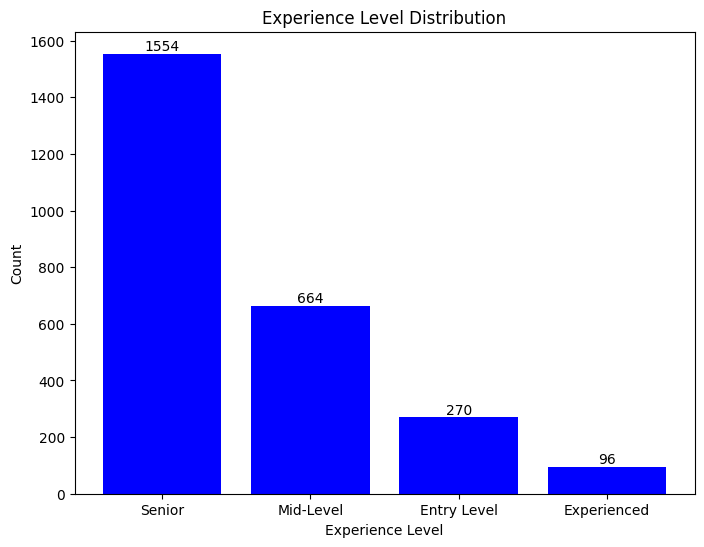

In [10]:
# Calcular el recuento de valores en la columna 'experience_level'
experience_level_counts = jobs1["experience_level"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

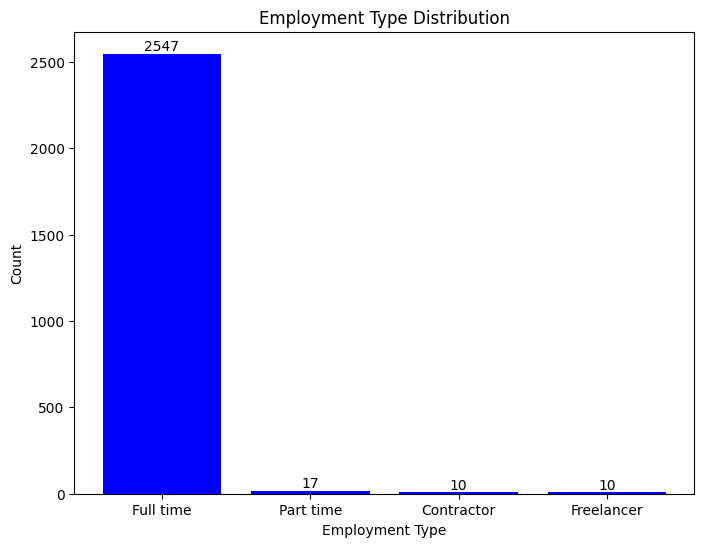

In [12]:
# Calcular el recuento de valores en la columna 'experience_level'
experience_level_counts = jobs1["employment_type"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

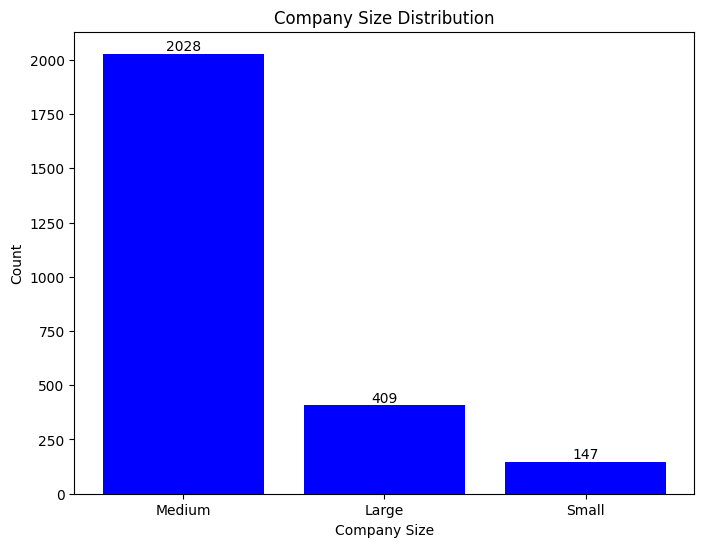

In [14]:
# Calcular el recuento de valores en la columna 'experience_level'
company_size_counts = jobs1["company_size"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(company_size_counts.index, company_size_counts.values, color='blue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

Let's check how many times the job titles are repeated.

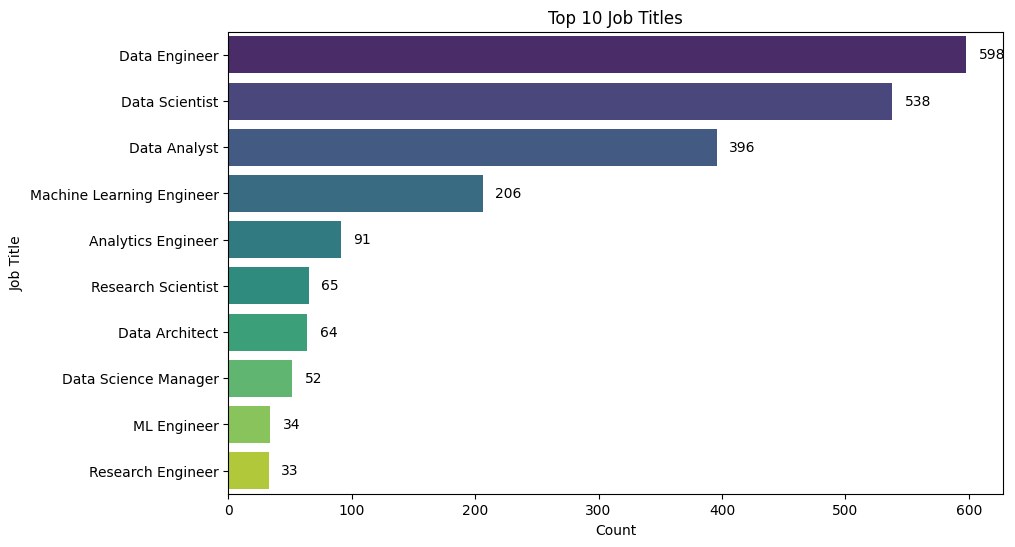

In [15]:
# Calculate the top 10 most common job titles
top_job_titles = jobs1['job_title'].value_counts().nlargest(10)

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Generate a bar plot using seaborn
barplot = sns.barplot(y=top_job_titles.index, x=top_job_titles.values, hue=top_job_titles.index, palette='viridis', legend=False)

# Add text annotations to the bar plot
for i in range(top_job_titles.shape[0]):
    barplot.text(top_job_titles.iloc[i] + 10, i, top_job_titles.iloc[i], va='center')

# Add title and labels to the plot
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Display the plot
plt.show()

In [16]:
# Define a dictionary for job roles and their corresponding salaries
job_roles = {
    'Data Engineer': 'Data Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Analytics Engineer': 'Analytics Engineer'}

# Iterate over the job roles and calculate the highest, lowest, and average salaries
for role, title in job_roles.items():
    salaries = jobs1[jobs1['job_title'] == title]['salary_in_usd']
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Print the salary summary for each role
    print(role + ':')
    print('  - Highest Salary:', max_salary)
    print('  - Lowest Salary:', min_salary)
    print('  - Average Salary:', avg_salary)
    print()

Data Engineer:
  - Highest Salary: 324000
  - Lowest Salary: 12000
  - Average Salary: 139861

Data Scientist:
  - Highest Salary: 412000
  - Lowest Salary: 5679
  - Average Salary: 132974

Data Analyst:
  - Highest Salary: 430967
  - Lowest Salary: 5723
  - Average Salary: 105324

Machine Learning Engineer:
  - Highest Salary: 342300
  - Lowest Salary: 12000
  - Average Salary: 147466

Analytics Engineer:
  - Highest Salary: 289800
  - Lowest Salary: 7500
  - Average Salary: 150151



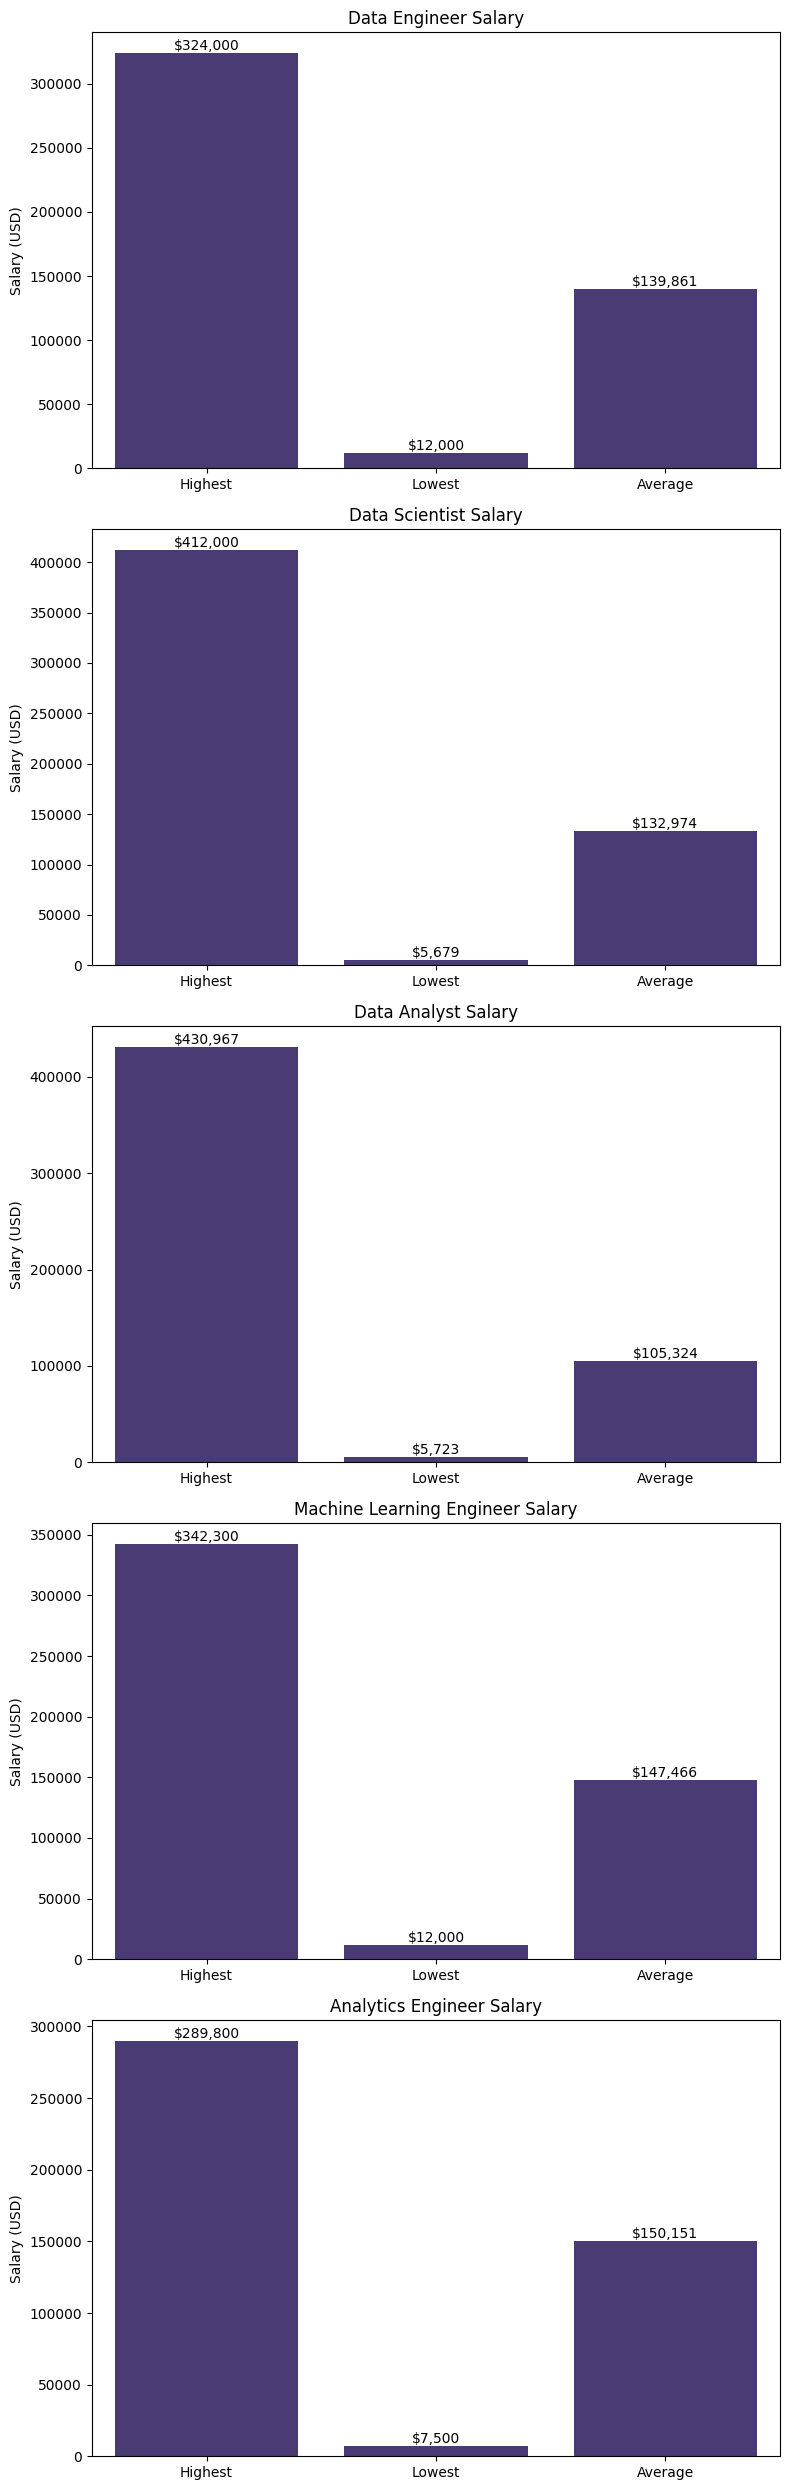

In [17]:
# Define the job roles
job_roles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# Set the seaborn palette
sns.set_palette("viridis")

# Create a grid of subplots for job roles' salary summary
fig, axs = plt.subplots(len(job_roles), 1, figsize=(8, 5 * len(job_roles)))

# Iterate over job roles
for i, role in enumerate(job_roles):
    # Filter the dataset for the specific job role
    salaries = jobs1[jobs1['job_title'] == role]['salary_in_usd']
    
    # Calculate the highest, lowest, and average salaries
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Plot the salary summary
    sns.barplot(x=['Highest', 'Lowest', 'Average'], y=[max_salary, min_salary, avg_salary], ax=axs[i])
    axs[i].set_title(f'{role} Salary')
    axs[i].set_ylabel('Salary (USD)')
    
    # Add value labels to the bars
    for j, value in enumerate([max_salary, min_salary, avg_salary]):
        axs[i].text(j, value, f'${value:,}', ha='center', va='bottom')

# Adjust spacing between subplots and remove any excess blank space
plt.tight_layout()

# Show the plot
plt.show()

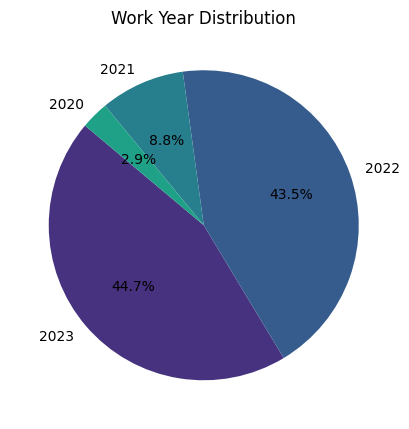

In [18]:
work_year_counts = jobs1['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()

In [173]:
average_salary_by_job_title = jobs1.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).astype(int)
print('\nAverage Salary by Job Title:');print(average_salary_by_job_title)


Average Salary by Job Title:
job_title
Data Science Tech Lead           375000
Cloud Data Architect             250000
Data Lead                        212500
Data Analytics Lead              211254
Principal Data Scientist         198171
                                  ...  
Autonomous Vehicle Technician     26277
3D Computer Vision Researcher     21352
Staff Data Analyst                15000
Product Data Scientist             8000
Power BI Developer                 5409
Name: salary_in_usd, Length: 93, dtype: int32


The job title with the highest average salary is "Data Science Tech Lead", with an average salary of $375,000.

The job title with the lowest average salary is "Power BI Developer", with an average salary of $5,409

### Top salaries